# Retail Orders Data Visualization

This notebook explores the retail orders dataset and provides various visualizations using Pandas and Matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "./dataset/orders_cleaned.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Convert order_date to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Display basic info
df.head()

,Unnamed: 0,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


## Sales Over Time

In [4]:
df['order_date'].dt.to_period('M')

0       2023-03
1       2023-08
2       2023-01
3       2022-06
4       2022-07
         ...   
9989    2023-02
9990    2023-03
9991    2022-08
9992    2022-11
9993    2022-07
Name: order_date, Length: 9994, dtype: period[M]

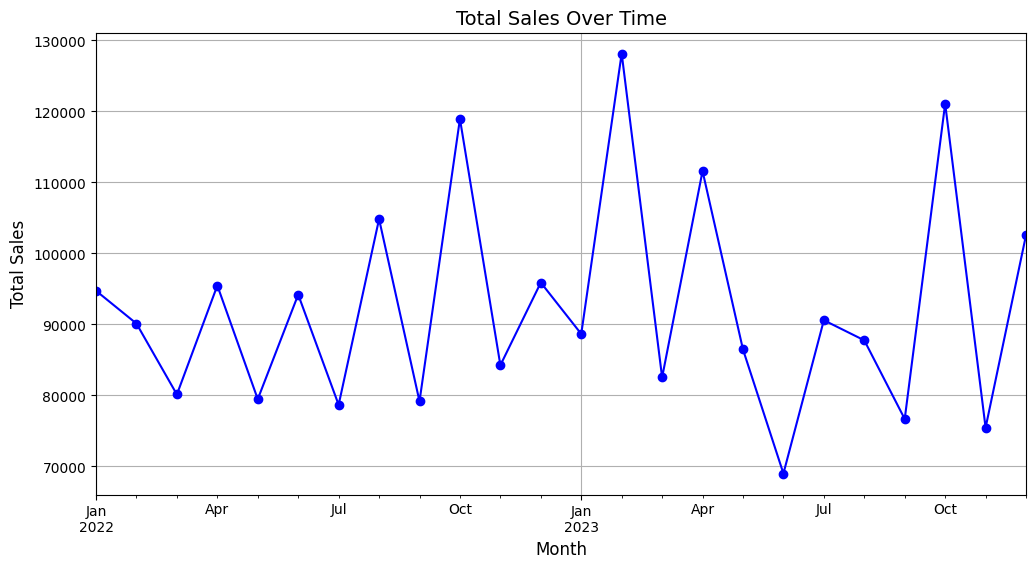

In [5]:
plt.figure(figsize=(12, 6))
df.groupby(df['order_date'].dt.to_period('M'))['sale_price'].sum().plot(kind='line', marker='o', color='b')
plt.title("Total Sales Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.show()


## Sales by Region

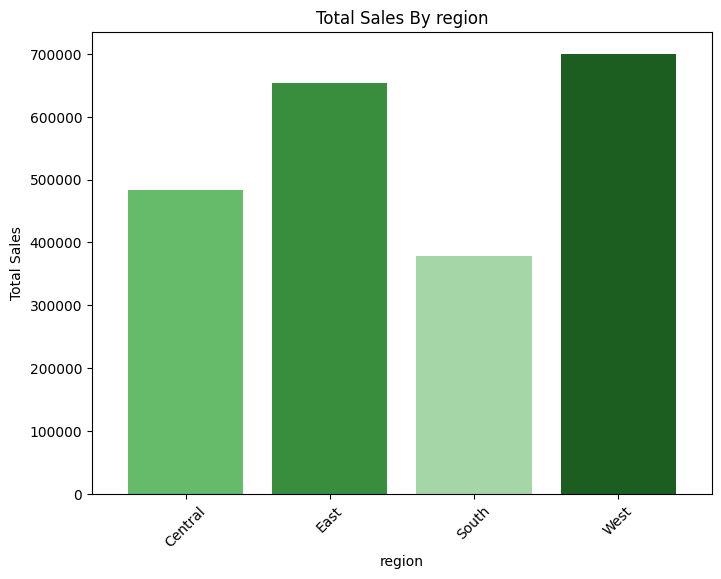

In [46]:
plt.figure(figsize=(8, 6))
df.groupby("region")["sale_price"].sum().plot(kind='bar', color =["#66BB6A", "#388E3C", "#A5D6A7", "#1B5E20"] ,width=0.8)
plt.title("Total Sales By region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45 )
plt.show()


## Category-wise Sales Distribution

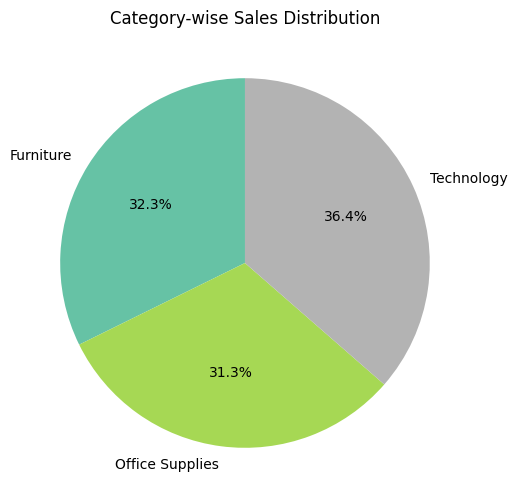

In [17]:
plt.figure(figsize=(8, 6))
df.groupby("category")["sale_price"].sum().plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Set2")
plt.title("Category-wise Sales Distribution")
plt.ylabel("")
plt.show()


## Discount vs. Profit

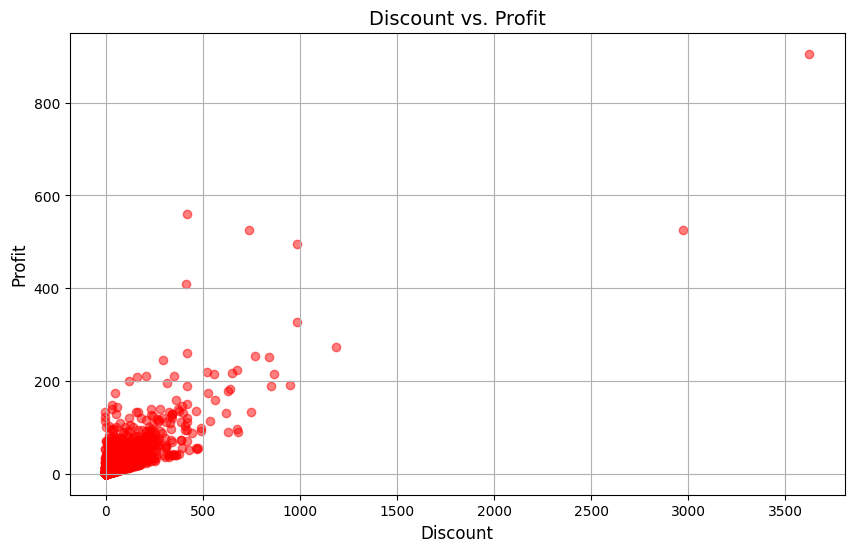

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['profit'], y=df['discount'], alpha=0.5, color="red")
plt.title("Discount vs. Profit", fontsize=14)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.grid(True)
plt.show()


## Total Quantity sold by sub-category

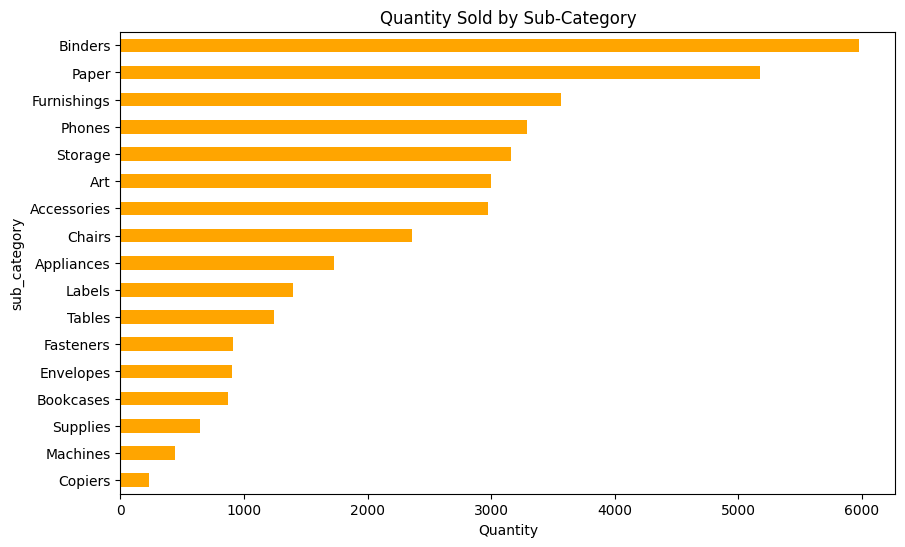

In [13]:
df.groupby("sub_category")["quantity"].sum().sort_values().plot(kind="barh", figsize=(10,6), color="orange")
plt.xlabel('Quantity')
plt.title('Quantity Sold by Sub-Category')
plt.show()

## Top 10 Cities by Total Sales (%)

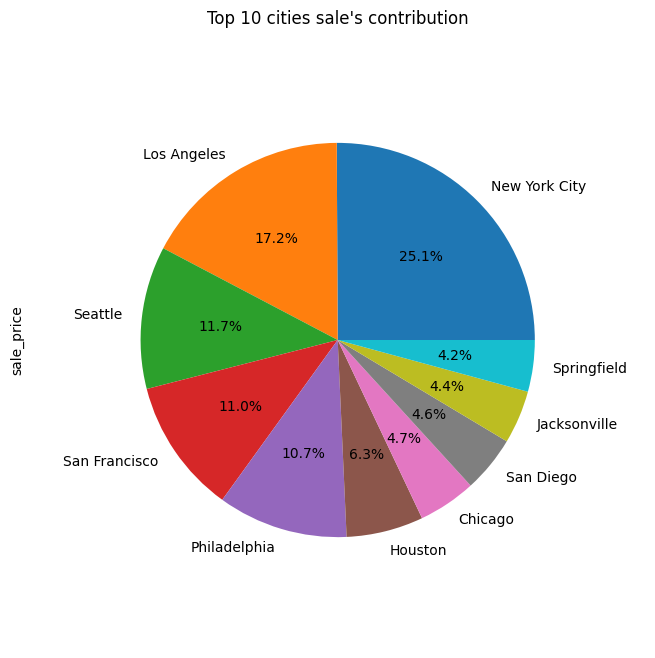

In [10]:
df.groupby("city")["sale_price"].sum().nlargest(10).plot(kind="pie", autopct="%1.1f%%", figsize=(8,8),radius=0.8)
plt.title("Top 10 cities sale's contribution")
plt.show()

## Sales vs Quanity (size and color of bubble shows Profit)

C:\Users\Irfanullah's laptop\AppData\Roaming\Python\Python313\site-packages\matplotlib\collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


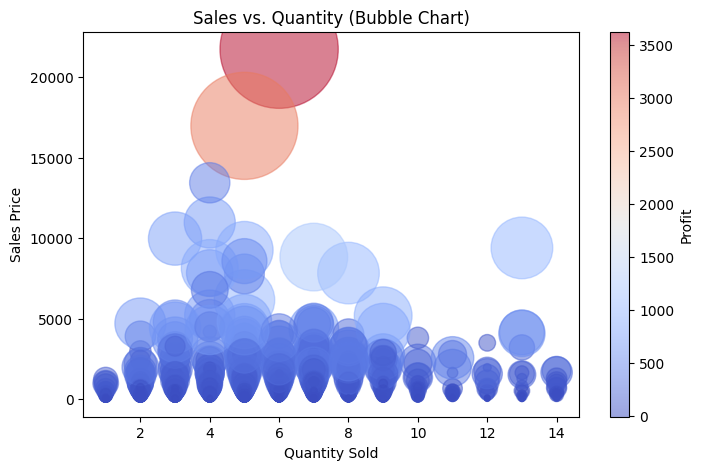

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df["quantity"], df["sale_price"], s=df["profit"]*2, alpha=0.5, c=df["profit"], cmap="coolwarm")
plt.colorbar(label="Profit")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales Price")
plt.title("Sales vs. Quantity (Bubble Chart)")
plt.show()

## Profit by sub_category

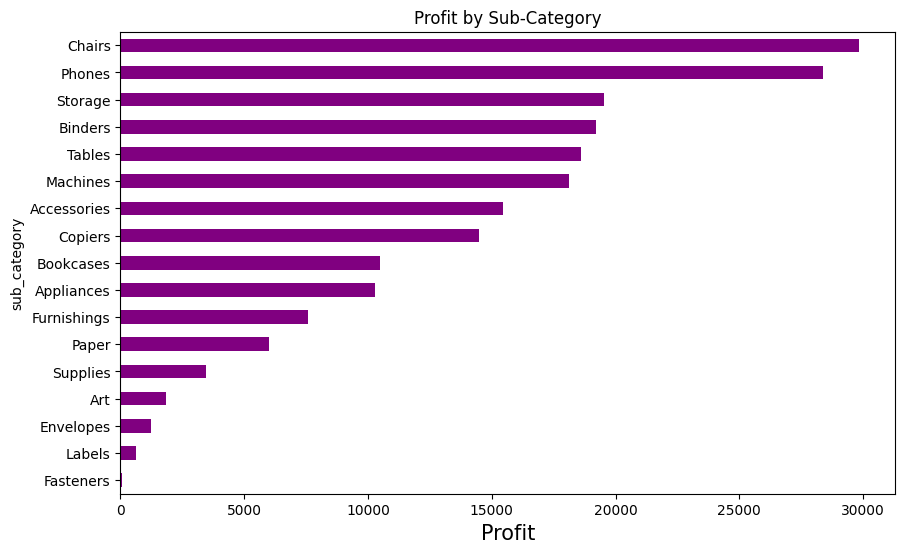

In [30]:
df.groupby("sub_category")["profit"].sum().sort_values().plot(kind="barh", figsize=(10,6), color="purple", title="Profit by Sub-Category")
plt.xlabel('Profit',fontdict={'fontsize':15})
plt.show()

## Conclusion
This notebook provides insights into sales trends, regional distribution, category contributions, and the relationship between discounts and profits.